# SC2001 SCED Group 6 Project 1 

### Problem: 
- In Mergesort, when the sizes of subarrays are small, the overhead of many recursive 
calls  makes  the  algorithm  inefficient.  
- Therefore,  in  real  use,  we  often  combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. 

The idea is to set a small integer S as a threshold for the size of subarrays.   
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, 
the algorithm will switch to Insertion Sort, which is efficient for small-sized input. 

### Code for Insertion Sort:

In [8]:
def insertion_sort(arr):
    comparisons = 0 # initialize comparison counter

    for i in range(1, len(arr)): # traverse through the array
        key = arr[i]        # current element
        j = i - 1           # previous element
        while j >= 0:
            comparisons += 1            # increment comparison counter
            if key < arr[j]:            # check if key is less than element j, if yes :
                arr[j + 1] = arr[j]         # shift element j to the right
                j -= 1                      # move to the previous element, until all elements before i are checked
            else:
                break                       # if key is not less than arr[j], break the while loop
        arr[j + 1] = key            # place key right after j

    return arr, comparisons

### Code for MergeSort: 

In [3]:
def mergesort(A):
    if (len(A) <= 1): 
        return A
    mid = len(A) // 2 # find the middle index
     # recursively sort the two halves
    A1 = mergesort(A[:mid])
    A2 = mergesort(A[mid:])
        # merge the two sorted halves
    return merge(A1, A2)


def merge(A1, A2):
    i, j = 0, 0 # pointers to current index in A1 and A2

    sorted = [] # initialize empty list to store the sorted elements

    while i < len(A1) and j < len(A2):
        if A1[i] < A2[j]: # compare elements from both arrays and append the smaller one to the sorted list
            sorted.append(A1[i])
            i += 1
        else:
            sorted.append(A2[j])
            j += 1
    sorted.extend(A1[i:])
    sorted.extend(A2[j:])
    return sorted

<div >

Functions we need to incorporate in hybrid sort:   
  
- recursion (from mergesort) to break up the array into subarrays of size = S
- merge() function to merge the subarrays at the end
- Insertion sort for subarrays of size S 


</div>

### (a) Our implementation of Hybrid Sort: 

In [9]:
def insertion_merge_hybird_sort(arr, S=16): # use S=16 as default threshold
    """Sorts an array using mergesort splitting until subarrays are size S, then use Insertion sort for those small subarrays, then merge back up."""
    if len(arr) <= S:
        sorted_arr, comparisons = insertion_sort(arr) # use the insertion sort for the broken up arrays that are <= S size
        return sorted_arr, comparisons
    else:
        mid = len(arr) // 2 # find the middle index

        # split and sort the two halves recursively, then merge and return total comparisons
        # also count comparisons made in the insertion sorts
        left, comp_left = insertion_merge_hybird_sort(arr[:mid], S)
        right, comp_right = insertion_merge_hybird_sort(arr[mid:], S)
        merged = merge(left, right)

        return merged, comp_left + comp_right # returns the merged sorted array and total comparisons made in the hybrid sort
    
# small helper function to check if an array is sorted
def sorted_check(arr):
    """Helper function to check if an array is sorted."""
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True


We used a value of 16 for the threshold, S   
This is because :
- it is a small value, which is efficient for insertion sort, and 
- it is big enough to make a difference by reducing the number of array splits. 
- Moreover, it is similar to that of the hybrid introspective sort, which uses a threshold of array size = 16 to switch to insertion sort 
 
This gives us a reasonable baseline for S to work with, and find the optimal S through empirical study

### (b) Generating Input Data: 

we generated input data to test the hybrid algorithm:   
  
we need:
- arrays of increasing sizes, in a range from 1000 to 10 million 
- For each of the sizes, a random dataset of integers : [1,..., x]
- The maximum value allowed in the dataset would be the the respective maximum sizes of the arrays
eg. array size of 1000: x = 1000 
- This is to increase chances of duplicate data for testing 


1. number of different arrays to test : 

In [10]:
arr_size = list(range(1000, 10_001, 1000)) \
         + list(range(20_000, 100_001, 10_000)) \
         + list(range(200_000, 1_000_001, 100_000)) \
         + list(range(2_000_000, 10_000_001, 1_000_000))

# generates array sizes from 1000 to 10 million 
# 1000 to 10,000 - 10 sizes
# 20,000 to 100,000 - 9 sizes
# 200,000 to 1,000,000 - 9 sizes
# 2,000,000 to 10,000,000 - 9 sizes
# total of 37 different sizes of arrays to test

2. datasets for each array : 

In [11]:
import random

list_of_arrays = []

for x in arr_size:
    arr = [ random.randint(1, x) for _ in range(x)] # generate random arrays from 1 to (size of array) AKA x for those 37 sizes in arr_size
    list_of_arrays.append(arr)

Analyze Time Complexity: 

running the code and recording the number of key comparisons in each case 

In [12]:
import time
import matplotlib.pyplot as plt

if __name__ == "__main__":
    for arr in list_of_arrays:
        print('-------------------------------')
        print("Array size:", len(arr))
        sorted_arr, comparisons = insertion_merge_hybird_sort(arr)
        print("Key comparisons:", comparisons)
        print("Sorted check:", sorted_check(sorted_arr))

-------------------------------
Array size: 1000
Key comparisons: 4474
Sorted check: True
-------------------------------
Array size: 2000
Key comparisons: 8835
Sorted check: True
-------------------------------
Array size: 3000
Key comparisons: 10225
Sorted check: True
-------------------------------
Array size: 4000
Key comparisons: 17955
Sorted check: True
-------------------------------
Array size: 5000
Key comparisons: 14376
Sorted check: True
-------------------------------
Array size: 6000
Key comparisons: 20494
Sorted check: True
-------------------------------
Array size: 7000
Key comparisons: 27737
Sorted check: True
-------------------------------
Array size: 8000
Key comparisons: 35672
Sorted check: True
-------------------------------
Array size: 9000
Key comparisons: 23693
Sorted check: True
-------------------------------
Array size: 10000
Key comparisons: 28680
Sorted check: True
-------------------------------
Array size: 20000
Key comparisons: 58135
Sorted check: True

Now to make the results clearer, lets represent it on a graph of array size against number of key comparisons and a graph of array size against time taken

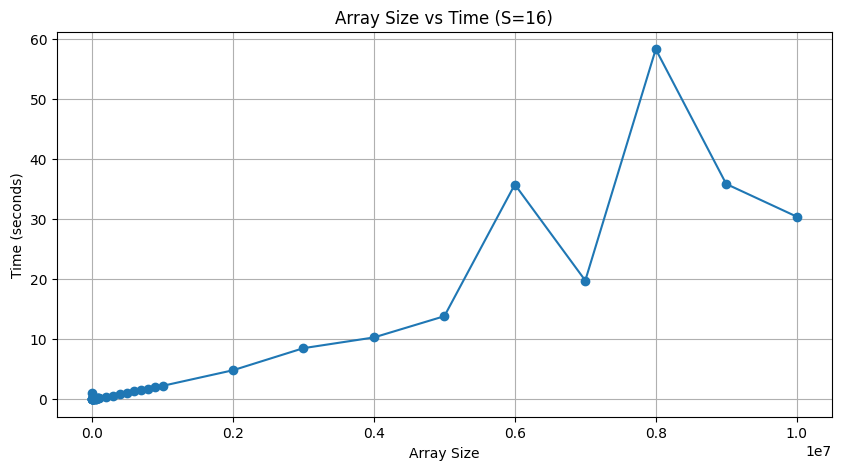

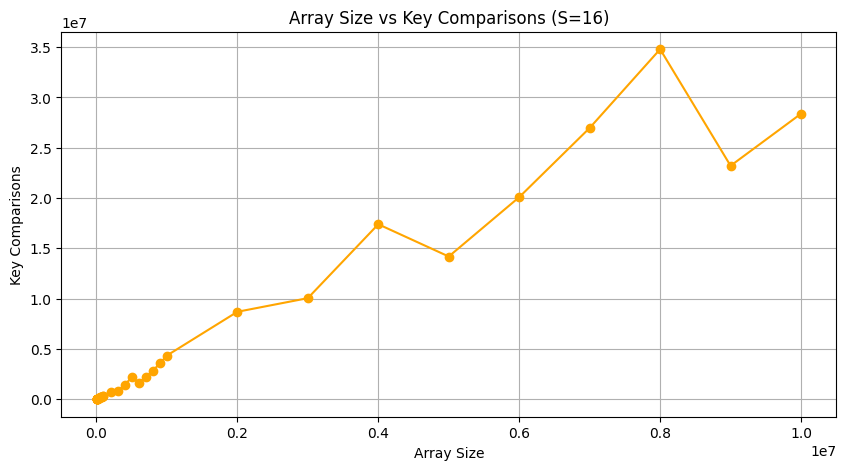

In [14]:
# Generating a graph of array size vs key comparisons
if __name__ == "__main__":
    sizes = []
    comparisons_list = []
    times_list = []
    
    for arr in list_of_arrays:
        start = time.perf_counter()
        sorted_arr, comparisons = insertion_merge_hybird_sort(arr)
        end = time.perf_counter()
        sizes.append(len(arr))
        comparisons_list.append(comparisons)
        times_list.append(end - start)

    # Plot array size vs time
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times_list, marker='o')
    plt.xlabel('Array Size')
    plt.ylabel('Time (seconds)')
    plt.title('Array Size vs Time (S=16)')
    plt.grid(True)
    plt.show()

    # Plot array size vs key comparisons
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, comparisons_list, marker='o', color='orange')
    plt.xlabel('Array Size')
    plt.ylabel('Key Comparisons')
    plt.title('Array Size vs Key Comparisons (S=16)')
    plt.grid(True)
    plt.show()

        

Theoretical analysis of the time complexity: 

...

With  the  value  of  S  fixed,  plot  the  number  of  key  comparisons  over 
different sizes of the input list n.

Compare empirical results with the theoretical analysis 

compare here 

With the input size n fixed, plot the number of key comparisons over 
different  values  of  S.

Compare empirical results with the theoretical analysis 

Using  different  sizes  of  input  datasets,  study  how  to  determine  an 
optimal value of S for the best performance of this hybrid algorithm.

Compare hybrid sort with original mergesort 

Implement  the  original  version  of 
Mergesort (as learnt in lecture). Compare its performance against the above 
hybrid algorithm in terms of the number of key comparisons and CPU times on 
the dataset with 10 million integers. You can use the optimal value of S obtained 
in (c) for this task. 

## Conclusion: 

we notice that 